Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges.

we perform classification by finding the hyper-plane that differentiate the two classes 

It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
data = pd.read_csv("bill_authentication.csv")  

In [3]:
data.shape

(1372, 5)

In [13]:
# The below line give the input/independent columns 
X = data[['Variance','Skewness','Curtosis','Entropy']]
#X = data.drop('Class', axis=1)  
y = data['Class']  

In [14]:
X.head(4)

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210
2,3.8660,-2.6383,1.9242,0.10645
3,3.4566,9.5228,-4.0112,-3.59440


In [5]:
y

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1342    1
1343    1
1344    1
1345    1
1346    1
1347    1
1348    1
1349    1
1350    1
1351    1
1352    1
1353    1
1354    1
1355    1
1356    1
1357    1
1358    1
1359    1
1360    1
1361    1
1362    1
1363    1
1364    1
1365    1
1366    1
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)  

In [7]:
import sklearn.svm
print(dir(sklearn.svm))

['LinearSVC', 'LinearSVR', 'NuSVC', 'NuSVR', 'OneClassSVM', 'SVC', 'SVR', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'base', 'bounds', 'classes', 'l1_min_c', 'liblinear', 'libsvm', 'libsvm_sparse']


In [17]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
print(dir(svclassifier))

['C', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_proba', '_compute_kernel', '_decision_function', '_dense_decision_function', '_dense_fit', '_dense_predict', '_dense_predict_proba', '_dual_coef_', '_estimator_type', '_gamma', '_get_coef', '_get_param_names', '_impl', '_intercept_', '_pairwise', '_predict_log_proba', '_predict_proba', '_sparse', '_sparse_decision_function', '_sparse_fit', '_sparse_kernels', '_sparse_predict', '_sparse_predict_proba', '_validate_for_predict', '_validate_targets', '_warn_from_fit_status', 'cache_size', 'class_weight', 'class_weight_', 'classes_', 'coef0', 'coef_', 'decision_function', 

In [19]:
svclassifier.support_vectors_

array([[-7.86900e-01,  9.56630e+00, -3.78670e+00, -7.50340e+00],
       [ 3.79840e-01,  7.09750e-01,  7.57160e-01, -4.44410e-01],
       [ 3.79800e-01,  7.09800e-01,  7.57200e-01, -4.44400e-01],
       [ 3.29240e-01, -4.45520e+00,  4.57180e+00, -9.88800e-01],
       [-1.85840e+00,  7.88600e+00, -1.66430e+00, -1.83840e+00],
       [-1.85840e+00,  7.88600e+00, -1.66430e+00, -1.83840e+00],
       [ 5.19500e-01, -3.26330e+00,  3.08950e+00, -9.84900e-01],
       [ 5.70600e-01, -2.48000e-02,  1.24210e+00, -5.62100e-01],
       [-7.86900e-01,  9.56630e+00, -3.78670e+00, -7.50340e+00],
       [ 5.19500e-01, -3.26330e+00,  3.08950e+00, -9.84900e-01],
       [ 5.19500e-01, -3.26330e+00,  3.08950e+00, -9.84900e-01],
       [ 3.79800e-01,  7.09800e-01,  7.57200e-01, -4.44400e-01],
       [ 3.29200e-01, -4.45520e+00,  4.57180e+00, -9.88800e-01],
       [ 5.70600e-01, -2.48000e-02,  1.24210e+00, -5.62100e-01],
       [ 3.29200e-01, -4.45520e+00,  4.57180e+00, -9.88800e-01],
       [ 5.70600e-01, -2.

In [20]:
y_pred = svclassifier.predict(X_test)  

In [21]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[225   2]
 [  1 184]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       227
           1       0.99      0.99      0.99       185

   micro avg       0.99      0.99      0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

A hyperplane is a decision plane which separates between a set of objects having different class memberships.

A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

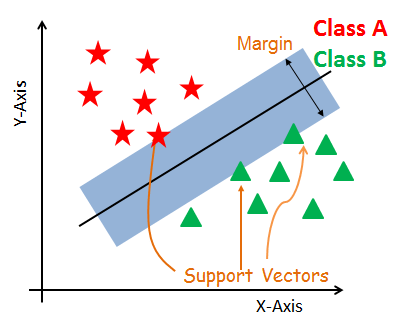

In [21]:
from IPython.display import Image
Image(filename = "svm.png",width=400,height=400)

kernel = linear , poly , rbf , sigmoid

RBF = Radial Basis Function Kernel

In [22]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)  

C:\Users\DBREDDY\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
y_pred = svclassifier.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[227   0]
 [  0 185]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       185

   micro avg       1.00      1.00      1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [25]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly')  
svclassifier.fit(X_train, y_train)  

C:\Users\DBREDDY\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
y_pred = svclassifier.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[223   4]
 [  0 185]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       227
           1       0.98      1.00      0.99       185

   micro avg       0.99      0.99      0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [28]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid', degree=8)  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[155  72]
 [ 94  91]]
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       227
           1       0.56      0.49      0.52       185

   micro avg       0.60      0.60      0.60       412
   macro avg       0.59      0.59      0.59       412
weighted avg       0.59      0.60      0.59       412



C:\Users\DBREDDY\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
kernels = ['linear','poly','rbf','sigmoid']

for i in kernels:
    svclassifier = SVC(kernel=i)  
    print(i)
    svclassifier.fit(X_train, y_train) 
    y_pred = svclassifier.predict(X_test)  
    print(confusion_matrix(y_test, y_pred))  
    print(classification_report(y_test, y_pred))
    print("_________________________*****************_________________")
    

linear
[[225   2]
 [  1 184]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       227
           1       0.99      0.99      0.99       185

   micro avg       0.99      0.99      0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

_________________________*****************_________________
poly
[[223   4]
 [  0 185]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       227
           1       0.98      1.00      0.99       185

   micro avg       0.99      0.99      0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

_________________________*****************_________________
rbf


C:\Users\DBREDDY\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DBREDDY\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[227   0]
 [  0 185]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       185

   micro avg       1.00      1.00      1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

_________________________*****************_________________
sigmoid
[[155  72]
 [ 94  91]]


C:\Users\DBREDDY\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.62      0.68      0.65       227
           1       0.56      0.49      0.52       185

   micro avg       0.60      0.60      0.60       412
   macro avg       0.59      0.59      0.59       412
weighted avg       0.59      0.60      0.59       412

_________________________*****************_________________


If we compare the performance of the different types of kernels we can clearly see that the sigmoid kernel performs the worst. 
from confusion matrix , the sigmoid performing worstly and rbf done well classfication 